<a href="https://colab.research.google.com/github/kharly99/FIRST-RESPO1/blob/main/healthcare_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENTS**

The goal is to create a model that can predict if Age regulates Billing charges in hospitals and how much patients spend for a particular medical condition.


people with medical condition needs to know if Age determines how patients are charged in the hospital and also have a clue of how much they are going to be spending for a particular medical condition.

The dataset used has a couple of variables with information about some medical conditions  with their corresponding billing Amounts.







# **IMPORTING THE DATASET**

In [115]:
pip install streamlit

In [116]:
pip install category_encoders

In [117]:
pip install pyngrok

In [118]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from category_encoders import OneHotEncoder
import streamlit as st
import pickle
import warnings
warnings.filterwarnings('ignore')


health_df = pd.read_csv("/content/healthcare_dataset.csv")


In [119]:
 #check data type of df

health_df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [120]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# let's get the data info

health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                999 non-null    object 
 1   Age                 999 non-null    int64  
 2   Gender              999 non-null    object 
 3   Blood Type          999 non-null    object 
 4    Medical Condition  999 non-null    object 
 5   Date of Admission   999 non-null    object 
 6   Doctor              999 non-null    object 
 7   Hospital            999 non-null    object 
 8   Insurance Provider  999 non-null    object 
 9   Billing Amount      999 non-null    float64
 10  Room Number         999 non-null    int64  
 11  Admission Type      999 non-null    object 
 12  Discharge Date      999 non-null    object 
 13  Medication          999 non-null    object 
 14  Test Results        999 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 117.2+ 

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


df.info()returns information about the dataframe including the index data type and columns, non-null values and memory usage.
we can see that we have 13 variables and 999 observations for the dataset. seems like there are no missing values in the data frame

*This displays crucial details about the loaded data structure,
which is necessary before doing additional analysis.*



**CLEANING DATA AND ADDRESSING MISSING DATA**

Prior to analysis, it is common to examine the contents of the dataframe and clean the data to handle any missing values and formatting errors before analysis. We will be addressing the following;

*   Handle missing data
*   Remove duplicates
*   Correcting data types
*   Addressing outliers







In [123]:
#number of null values in each column
health_df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


when combining .isnull() method with .sum(), we can sum up all the missing values for each variables.


As we can see, there are no missing values in this dataset.we will now proceed to analyze the data, observe patterns, and identify outliers with the help of visualization methods.

# FIX FORMATTING ERRORS:

In [124]:
# Convert string columns to numeric
health_df['Age'] = pd.to_numeric(health_df['Age'])

# standardize date columns

health_df['Date of Admission'] = pd.to_datetime(health_df['Date of Admission'])
health_df['Discharge Date'] = pd.to_datetime(health_df['Discharge Date'])

In [125]:
# removing rows with empty data

health_df_1 = health_df.dropna()

health_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                999 non-null    object        
 1   Age                 999 non-null    int64         
 2   Gender              999 non-null    object        
 3   Blood Type          999 non-null    object        
 4    Medical Condition  999 non-null    object        
 5   Date of Admission   999 non-null    datetime64[ns]
 6   Doctor              999 non-null    object        
 7   Hospital            999 non-null    object        
 8   Insurance Provider  999 non-null    object        
 9   Billing Amount      999 non-null    float64       
 10  Room Number         999 non-null    int64         
 11  Admission Type      999 non-null    object        
 12  Discharge Date      999 non-null    datetime64[ns]
 13  Medication          999 non-null    object        

In [126]:
# count the number of unique values in each column

health_df.nunique()

,0
Name,996
Age,68
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,779
Doctor,991
Hospital,987
Insurance Provider,5
Billing Amount,999


In [127]:
health_df.duplicated().unique()

array([False])

In [128]:
health_df[health_df.duplicated(keep='first')]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [129]:
# removing duplicate rows

health_df[health_df.duplicated()]
health_df.drop_duplicates(keep='first',inplace=True)

**keep** = **'first'** is used to keep the first row of duplicated ones.


**inplace** = **True** is used to change the data frame permanently. if we didn't use **inplace** attributes, we would not remove the duplicated observation from the dataset

Because our dataset comprises mostly categorical variables, we will be dropping some columns that are not going to be beneficial for our the purpose of our analysis and Model building.


columns that we are going to be dropping includes the Date of Admission,Doctor,Hospital,Room Number,Discharge Date.




In [130]:
# let's remove columns that are not needed for now.


health_df.drop(columns=["Date of Admission", "Doctor", "Hospital", "Room Number", "Discharge Date"], inplace=True)



In [131]:
#let's recheck the columns

health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                999 non-null    object 
 1   Age                 999 non-null    int64  
 2   Gender              999 non-null    object 
 3   Blood Type          999 non-null    object 
 4    Medical Condition  999 non-null    object 
 5   Insurance Provider  999 non-null    object 
 6   Billing Amount      999 non-null    float64
 7   Admission Type      999 non-null    object 
 8   Medication          999 non-null    object 
 9   Test Results        999 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


# *Checking for outliers*

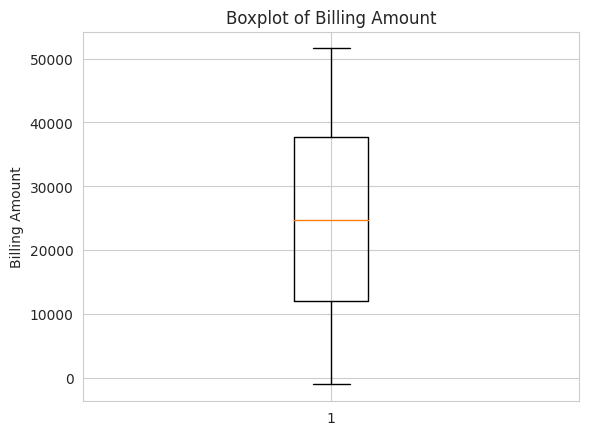

In [132]:
# Outliers: Checking for outliers with box-plot


# create a boxplot for the Billing amount column

plt.boxplot(health_df["Billing Amount"])
plt.title("Boxplot of Billing Amount")
plt.ylabel("Billing Amount")
plt.show()


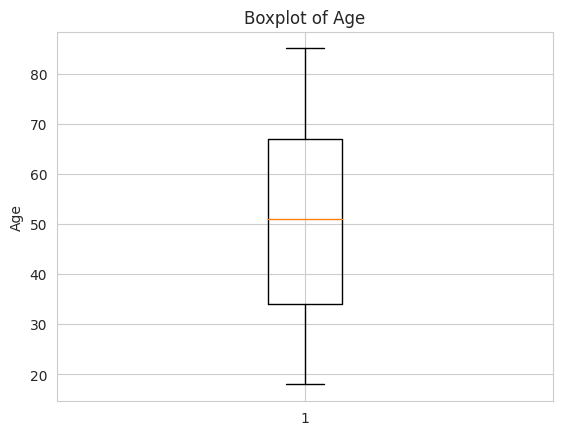

In [133]:
# create a boxplot for the Age column

plt.boxplot(health_df["Age"])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


The boxplot above shows that there are no outliers.

let's proceed in doing a summary statistics for the Date column


# **SUMMARY STATISTICS FOR DATE COLUMN**

In [134]:
#summary statistics for each column
health_df.describe()

,Age,Billing Amount
count,999.000000,999.000000
mean,50.972973,25099.622670
std,19.687241,14460.387378
min,18.000000,-1018.245371
25%,34.000000,12049.207285
50%,51.000000,24690.222180
75%,67.000000,37777.215685
max,85.000000,51587.936820


df.describe() generates descriptive statistics for us. For numeric data, the results's index will include count, mean,std,min,max as well as lower, 50(median) and upper percentile.

we can notice that the minimum age is 13 and the maximum age is 89.

In [135]:
# distribution of categorical columns
health_df['Gender'].value_counts()

,count
Gender,
Male,524
Female,475



# **DATA VISUALIZATION**

EXPLORATORY DATA ANALYSIS; Investigating relationships


*A picture is worth a thousand words.*

Now, we understood our dataset in general and checked the missing values. we also deleted duplicated values from the dataset frame.

The next part of this journey is data visualization!


*The goal here is to perform univariate,bivariate and multivaraite analysis to see distribution and relationship between variables*

# **UNIVARIATE ANALYSIS**


The purpose of the univariate analysis is to have a clearer understanding and also do a summary statistics of Categorical variables


we will perform univariate analysis by using visualization techniques.

**Univariate Analysis for Numerical Features**

**Gender**

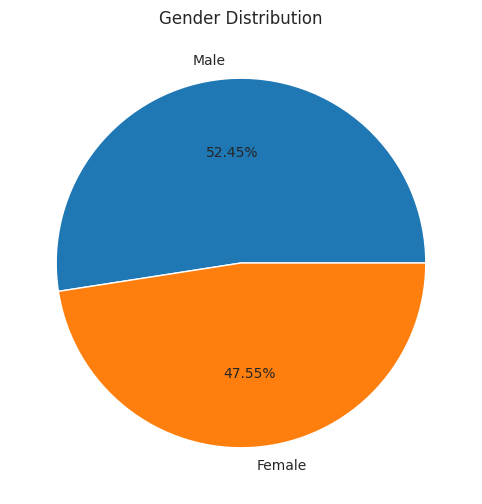

In [136]:
fig = plt.figure(figsize=(8,6))
plt.pie(health_df["Gender"].value_counts(),labels=health_df["Gender"].value_counts().index,autopct="%1.2f%%")
plt.title("Gender Distribution")

plt.show()

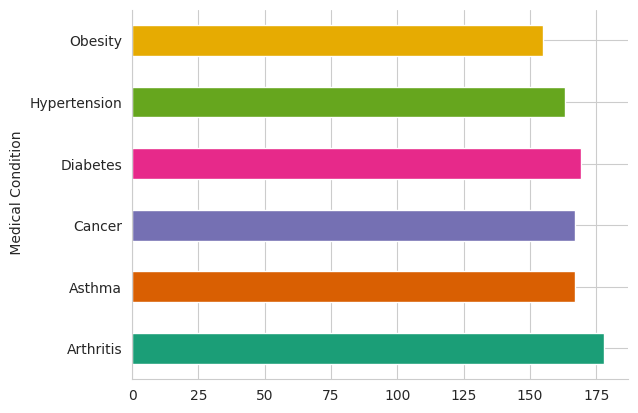

In [138]:
# @title  Medical Condition

from matplotlib import pyplot as plt
import seaborn as sns
health_df.groupby(' Medical Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the gender distribution, we can see that we have more patients that are male than female, although the gap isn't much.

**Admission Type**

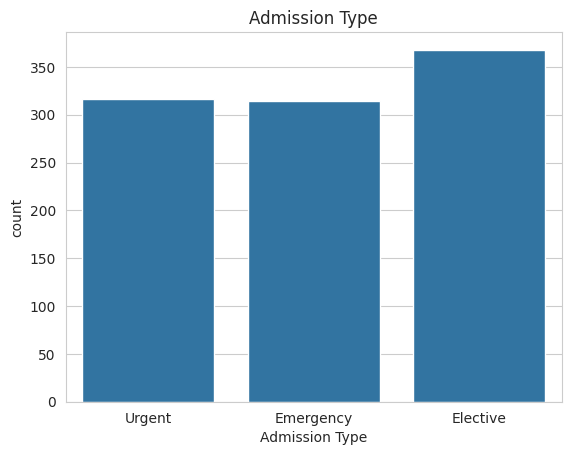

In [139]:
sns.countplot(x=health_df['Admission Type'])
plt.title('Admission Type')
plt.show()

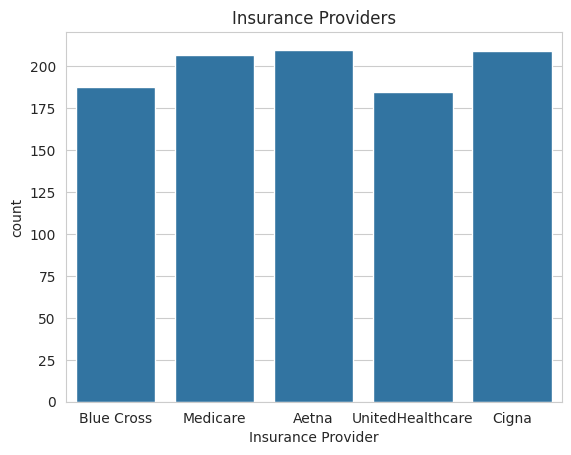

In [140]:
sns.countplot(x=health_df['Insurance Provider'])
plt.title('Insurance Providers')
plt.show()

# **BIVARIATE ANALYSIS**



Bivariate analysis is the analysis of exactly two variables. we will use bivariate analysis to find the relationship between two varaibles.

A sactter plot is a type of data display that shows the relationship between two numerical variables.


We see that there is a weak positive relationship between age and billing amounr. As age increases, Billing amount also slightly incrases.

**Medical Condition vs Billing Amount**

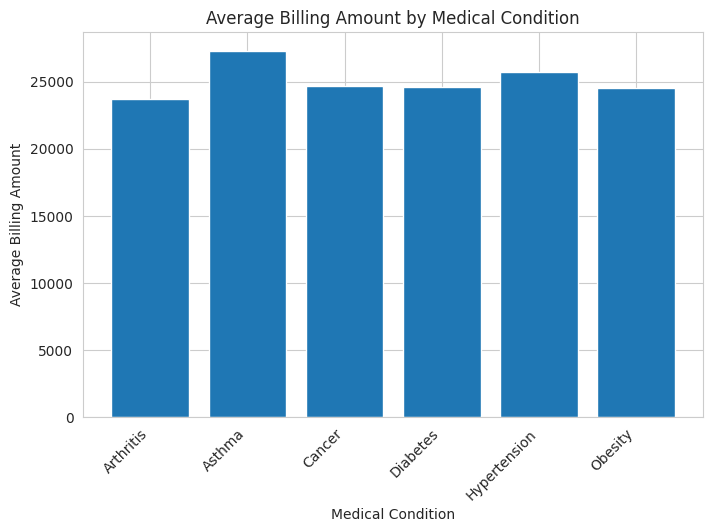

In [141]:
plt.figure(figsize=(8, 5))
plt.bar(health_df.groupby(' Medical Condition')['Billing Amount'].mean().index, health_df.groupby(' Medical Condition')['Billing Amount'].mean().values)
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing Amount by Medical Condition')
_ = plt.xticks(rotation=45, ha='right')

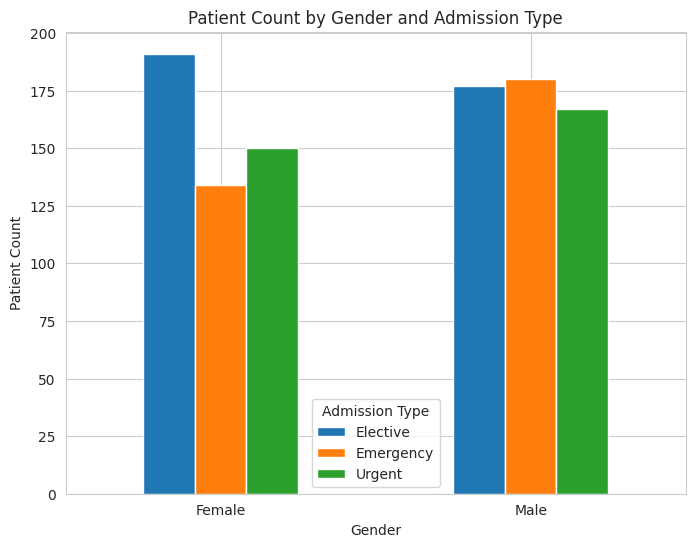

In [142]:
# @title Patient Count by Gender and Admission Type

import matplotlib.pyplot as plt

gender_counts = health_df.groupby(['Gender', 'Admission Type'])['Name'].count().unstack()

ax = gender_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Patient Count')
plt.title('Patient Count by Gender and Admission Type')
plt.xticks(rotation=0)
_ = plt.legend(title='Admission Type')

# **Insurance Provider vs Billing Amount**



Text(0.5, 1.0, 'Average Billing Amount by Insurance Provider')

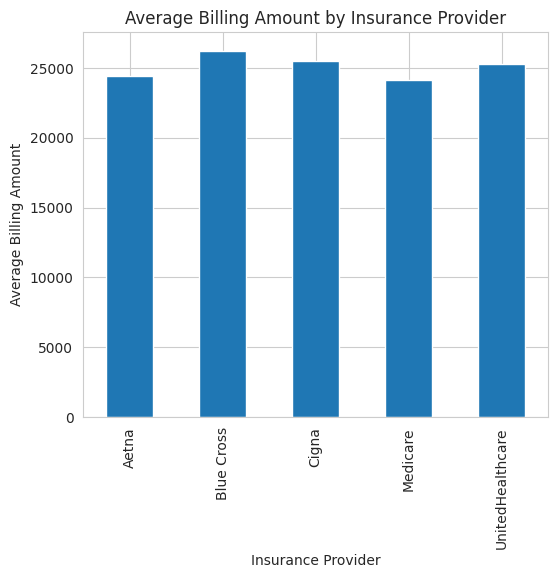

In [143]:
avg_billing_by_insurance = health_df.groupby('Insurance Provider')['Billing Amount'].mean()
plt.figure(figsize=(6, 5))
avg_billing_by_insurance.plot(kind='bar')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing Amount by Insurance Provider')

# **Scatter Plot**

Visualising the relationship between "Insurance Provider" and "Billing Amount"

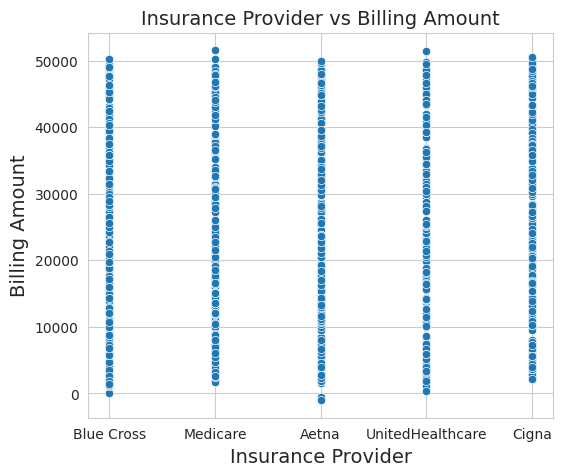

In [144]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Insurance Provider",y="Billing Amount",data=health_df)
plt.title("Insurance Provider vs Billing Amount", size=14)
plt.xlabel("Insurance Provider", size=14)
plt.ylabel("Billing Amount", size=14)
plt.show()

Scatterplot of Age and Billing Amount.
this is to determine if Age influences hospital charges.

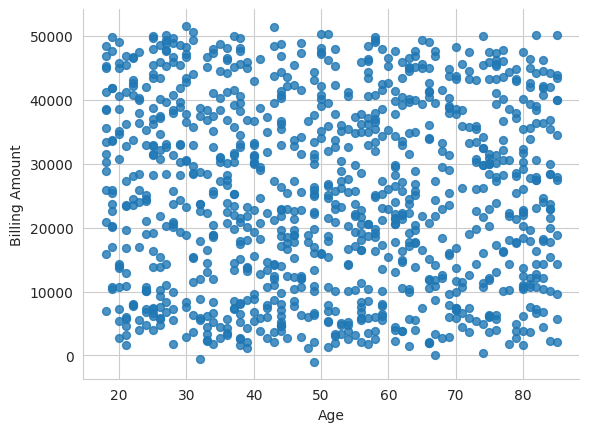

In [145]:
from matplotlib import pyplot as plt
health_df.plot(kind='scatter', x='Age', y='Billing Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Correlation Matrix

Investigate the relationship between "Billing Amount" and other columns



In [146]:
health_df[["Billing Amount", "Age"]].corr()

,Billing Amount,Age
Billing Amount,1.000000,-0.029194
Age,-0.029194,1.000000


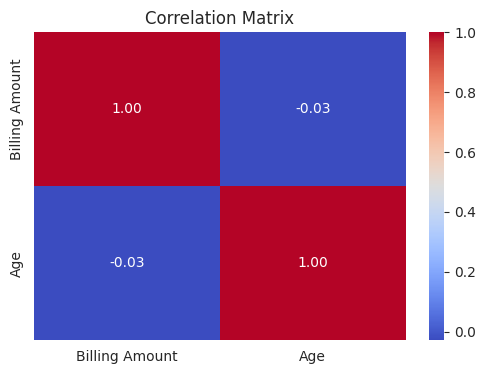

In [147]:
correlation_matrix = health_df[["Billing Amount", "Age"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


let's use a boxplot to check patients Age als influenced the medical test results


Text(0.5, 1.0, 'PATIENTS AGE AND MEDICAL TEST RESULT')

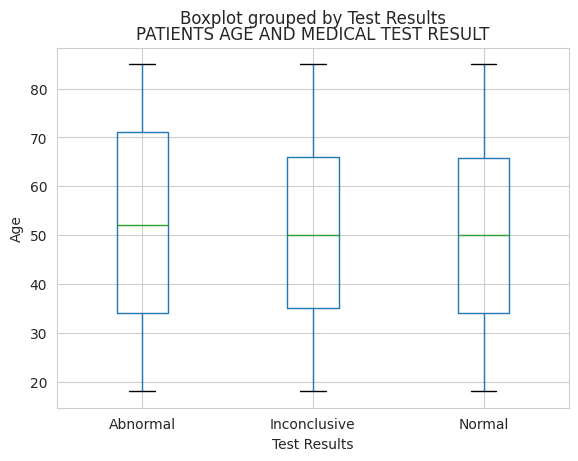

In [148]:
health_df.boxplot(column='Age', by='Test Results')

plt.xlabel('Test Results')
plt.ylabel('Age')
plt.title('PATIENTS AGE AND MEDICAL TEST RESULT')

Let's explore non numerical values and ascertain caetegorical variables with high and low cardinality.


In [149]:
# low- and high-cardinality categorical variables
health_df.select_dtypes("object").nunique()

,0
Name,996
Gender,2
Blood Type,8
Medical Condition,6
Insurance Provider,5
Admission Type,3
Medication,5
Test Results,3


From the above results, we can see that the columns are not all that balanced in terms of high cardinalty. But for the purpose of our prediction, we will be using the 'Medical Condition', 'Insurance Provider', and 'Medication' column in training the model we are creating.

In [150]:
# drop low- and high-cardinality categorical variables (Name, Gender,Blood Type, Admission Type, Test Results)
health_df.drop(columns=["Name", "Gender", "Blood Type ", "Admission Type", "Test Results"], inplace=True)

In [151]:
# check out what the dataframe looks like now

health_df.head()

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication
0,30,Cancer,Blue Cross,18856.28131,Paracetamol
1,62,Obesity,Medicare,33643.32729,Ibuprofen
2,76,Obesity,Aetna,27955.09608,Aspirin
3,28,Diabetes,Medicare,37909.78241,Ibuprofen
4,43,Cancer,Aetna,14238.31781,Penicillin


# **Splitting Dataset**

Splitting data comes in two steps:

split the dataset into feature and target variables

split the dataset into train and test data

In [152]:

# extracting/splitting data

# Identify the columns for feature & target values
feature = ["Age", " Medical Condition", "Insurance Provider","Medication"]
target = "Billing Amount"

# get all the values for feature and target
X = health_df[feature]
y = health_df[target]

print(X, "\n", y)

     Age  Medical Condition Insurance Provider   Medication
0     30             Cancer         Blue Cross  Paracetamol
1     62            Obesity           Medicare    Ibuprofen
2     76            Obesity              Aetna      Aspirin
3     28           Diabetes           Medicare    Ibuprofen
4     43             Cancer              Aetna   Penicillin
..   ...                ...                ...          ...
994   69             Asthma         Blue Cross    Ibuprofen
995   25           Diabetes           Medicare    Ibuprofen
996   66          Arthritis           Medicare      Lipitor
997   62       Hypertension   UnitedHealthcare   Penicillin
998   30       Hypertension   UnitedHealthcare      Lipitor

[999 rows x 4 columns] 
 0      18856.28131
1      33643.32729
2      27955.09608
3      37909.78241
4      14238.31781
          ...     
994    16057.82016
995    44041.57374
996    15086.15878
997    16377.52313
998    43488.83863
Name: Billing Amount, Length: 999, dtype: flo

In [153]:

# split data into train and test data
#(80% train, 20% test)

# create variables for train data for feature and target, test data for feature and target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


y_train




,Billing Amount
794,41248.13084
341,22230.12276
217,15826.10128
855,35821.64934
960,46268.72904
...,...
500,47270.24574
813,36649.32428
941,46186.16325
421,43353.40395


In [154]:
# Confirm the shapes of training and testing sets

#X_train.shape
#y_train.shape
#X_test.shape
#y_test.shape

print(f"X (feature)=>\ttrain: {X_train.shape} test:{X_test.shape} \ny (target)=>\ttrain:{y_train.shape} test:{y_test.shape}")

X (feature)=>	train: (799, 4) test:(200, 4) 
y (target)=>	train:(799,) test:(200,)


# **CREATING THE MODEL**

Creating the model requires three steps

Baselining

Create, and train/fit the model

Evaluate the performance of the model

**Baselining**

This involves creating a baseline (or dumb) model. The performance of this model is used as a benchmark to measure if the main model performs well or not

In [155]:
# creating the baseline model

#calculate the mean
y_mean = y_train.mean().round(1)

y_mean

24962.1

In [156]:
# create the baseline (mean) values

y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:5]

[24962.1, 24962.1, 24962.1, 24962.1, 24962.1]

In [157]:
# measure performance of the dumb model
# we will be using the mean absolute error (MAE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"Mean Billing charges: {round(y_mean, 1)} thousand dollars")
print(f"Mean absolute error for Baseline: {round(mae_baseline, 1)} thousand dollars")

Mean Billing charges: 24962.1 thousand dollars
Mean absolute error for Baseline: 12516.5 thousand dollars


# **CREATING AND FITTING THE MAIN MODEL**

In order to create our model and fit it with our training data, we are going to do the following

OneHotEncoder to encode categorical values

SimpleImputer to fill missing values

Ridge, instead of LinearRegression

In [158]:
# the model

model = make_pipeline(OneHotEncoder(), SimpleImputer(), Ridge())

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=[' Medical Condition', 'Insurance Provider',
                                     'Medication'])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [159]:


# confirm fitting

check_is_fitted(model[-1])


**Evaluation**


let's evaluate the performance of the model.

In [160]:
# let's calculate the mae for the model using training data

y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training).round(1))

Training MAE: 12474.6


In [161]:
# next, we calculate the mae for the model using test data

y_pred_test = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test).round(1))

Test MAE: 12565.8


The baseline mae (24962.1) is significantly higher than the model mae

* The baseline mae (24962.1) is significantly higher than the model mae (12474.6) for the train data. This suggests that the model is operating efficiently.


*   The model mae for test data (12565.8) and the model mae for train data (12474.6) are both extremely similar. This further suggests that the model has good generalizability.







# **Deployment**


our deployment will take the following steps


a simple function,
a slider widget, and then
a streamlit app.

In [162]:
def make_prediction(age, medical_condition, insurance_provider, medication):
    data = {
        "Age":age,
        " Medical Condition": medical_condition,
        "Insurance Provider": insurance_provider,
        "Medication": medication
    }
    health_df = pd.DataFrame(data, index=[0])
    prediction = model.predict(health_df).round(1)[0]
    return f"Predicted how Age regulates Billing charges and how much patients spend for a particular medical condition: {prediction} thousand dollars"


In [163]:
# lets test the function

make_prediction(20, "Diabetes","Medicare","Ibuprofen")

'Predicted how Age regulates Billing charges and how much patients spend for a particular medical condition: 23990.2 thousand dollars'

# **Slider Widget**

In [164]:

interact(
    make_prediction,
    age=IntSlider(
        min=X_test["Age"].min(),
        max=X_test["Age"].max(),
        value=X_test["Age"].mean(),
    ),
     medical_condition=Dropdown(
        options=sorted(X_test[" Medical Condition"].unique())
    ),
    insurance_provider=Dropdown(
        options=sorted(X_test["Insurance Provider"].unique())
    ),
    medication=Dropdown(
        options=sorted(X_test["Medication"].unique())
    )
);

interactive(children=(IntSlider(value=53, description='age', max=85, min=18), Dropdown(description='medical_co…

# **Streamlit Cloud**


This requires some steps:

*   Save the model with pickle or any alternative library

*   Save the Streamlit code in app.py file

*   Create a github repository

*  upload the model file and the app.py files to the repository

*   add a requirements.txt file

*   go to https://streamlit.io/cloud, create an account, and create an app

- follow the simple steps on https://streamlit.io/cloud, and your app should get deployed in a minute or less.

# Saving the Model

To use the trained model in Streamlit, it needs to be saved:

- to google drive
- from google drive to local drive

In [165]:
# Saving the model to model.pkl file on google drive, using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [166]:
# verify the model is saved

!ls


drive  healthcare_dataset.csv  model.pkl  sample_data


In [167]:
health_df.head(20)

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication
0,30,Cancer,Blue Cross,18856.28131,Paracetamol
1,62,Obesity,Medicare,33643.32729,Ibuprofen
2,76,Obesity,Aetna,27955.09608,Aspirin
3,28,Diabetes,Medicare,37909.78241,Ibuprofen
4,43,Cancer,Aetna,14238.31781,Penicillin
5,36,Asthma,UnitedHealthcare,48145.11095,Ibuprofen
6,21,Diabetes,Medicare,19580.87234,Paracetamol
7,20,Cancer,Cigna,45820.46272,Paracetamol
8,82,Asthma,Cigna,50119.22279,Aspirin
9,58,Cancer,UnitedHealthcare,19784.63106,Paracetamol


# Streamlit Code

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

In [168]:
# strealit

%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Load your model file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('How Age regulates Billing charges and how much patients spend for a particular medical condition predictor App')

# Add input widgets for user inputs
age = st.slider("Price (thousand dollars)", min_value=3, max_value=53, value=26)
curb_weight = st.slider("Curb Weight", min_value=1, max_value=5, value=2)

medical_condition = st.selectbox(
    " Medical Condition",
    ["Cancer", "Diabetes", "Asthma", "Obesity", "Arthritis", "Hypertension" ]
)
# When the 'Predict' button is clicked
if st.button("Predict"):
    # Prepare the input data as a DataFrame (since pipelines often expect a DataFrame)
    input_data = pd.DataFrame({
        'Age': [age],
        ' Medical Condition': [medical_condition],
        'Insurance Provider': [insurance_provider],
        'Medication': [medication]
    })
    prediction = model.predict(input_data)[0].round(2)
    st.write(f'The predicted value is: {prediction} thousand dollars')

Writing app.py


requirements.txt file Deploy the Streamlit app, a requirements.txt file has to be included in the github repository.

Run the code below to create the requirements.txt file.

In [169]:
%%writefile requirements.txt


streamlit
scikit-learn
numpy
pickle4
category_encoders

Writing requirements.txt


In [170]:
# save model.pkl to local drive
from google.colab import files
files.download("model.pkl")
files.download("app.py")
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>